

### 🌧️ Rainfall Prediction:

Rainfall prediction is one of the most challenging and uncertain tasks with a significant impact on human society. Accurate and timely forecasting can help proactively mitigate both human and financial losses.
This notebook presents a set of experiments using widely adopted machine learning algorithms to build models that predict whether it will rain tomorrow, based on weather data from major cities in Australia.

---

### 📄 This Work is Part of My Research Paper

This notebook is based on my research work titled:
**“A Data-Centric Approach to Weather Prediction: IoT and Machine Learning on Drone Platforms”**, published at **InGARSS 2024**.

The paper introduces a novel framework that integrates **IoT sensors** with **drone-mounted edge computing nodes** to perform real-time weather prediction for smart agriculture. Machine learning models are trained on historical weather data and deployed on edge nodes to reduce latency and improve decision-making efficiency in the field.

🔗 **[Read the full paper on GitHub](https://github.com/Devparihar5/A-Data-Centric-Approach-to-Weather-Prediction)**


In [67]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, validation_curve, cross_val_score
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')


In [4]:
file_path = '/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Exploration
We will first check the number of rows and columns. Next, we’ll check the size of the dataset to decide if it needs size compression

In [5]:
df.shape

(145460, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Univariate Analysis

In [8]:
# checking for the missing values 

df['RainTomorrow'].isnull().sum()

3267

In [9]:
# checking for the unique values
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
# view the frequency of the data
df['RainTomorrow'].value_counts(dropna=False)

No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64

Important points to note

- There are 3267 "NaN" missing values
- There are 31877 "Yes" that it will rain
- there are 110316 "No" that it wont rain

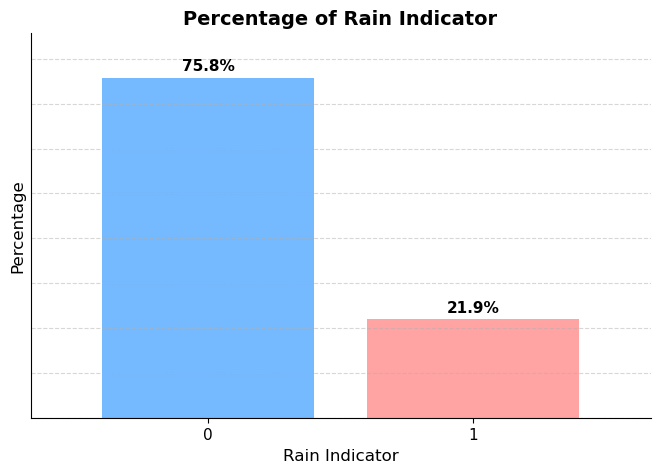

In [11]:
# Calculate the percentages of "0" and "1"
rain_indicator_counts = df.RainTomorrow.value_counts()
percentage_0 = rain_indicator_counts[0] / len(df) * 100
percentage_1 = rain_indicator_counts[1] / len(df) * 100

# Custom colors for the bar plot
colors = ['#66B2FF', '#FF9999']

# Create a new figure with adjusted figure size and background color
fig = plt.figure(figsize=(8, 5), facecolor='white')

# Create the bar plot for the percentages
ax = fig.add_subplot(111)
ax.bar(['0', '1'], [percentage_0, percentage_1], color=colors, alpha=0.9)

# Set plot title and axis labels with adjusted font size and weight
ax.set_title('Percentage of Rain Indicator', fontsize=14, fontweight='bold')
ax.set_xlabel('Rain Indicator', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)

# Add percentage labels above each bar with adjusted font size and position
for i, percentage in enumerate([percentage_0, percentage_1]):
    ax.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Adjust y-axis limits and tick parameters
ax.set_ylim(0, max(percentage_0, percentage_1) + 10)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Customize grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Remove spines on the top and right side of the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust the width of the bars
bar_width = 0.5
ax.bar_width = bar_width
ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'], fontsize=11)

# Adjust padding between the bars and the plot edges
ax.margins(x=0.15)

# Display the plot
plt.show()

## Data type distribution analysis

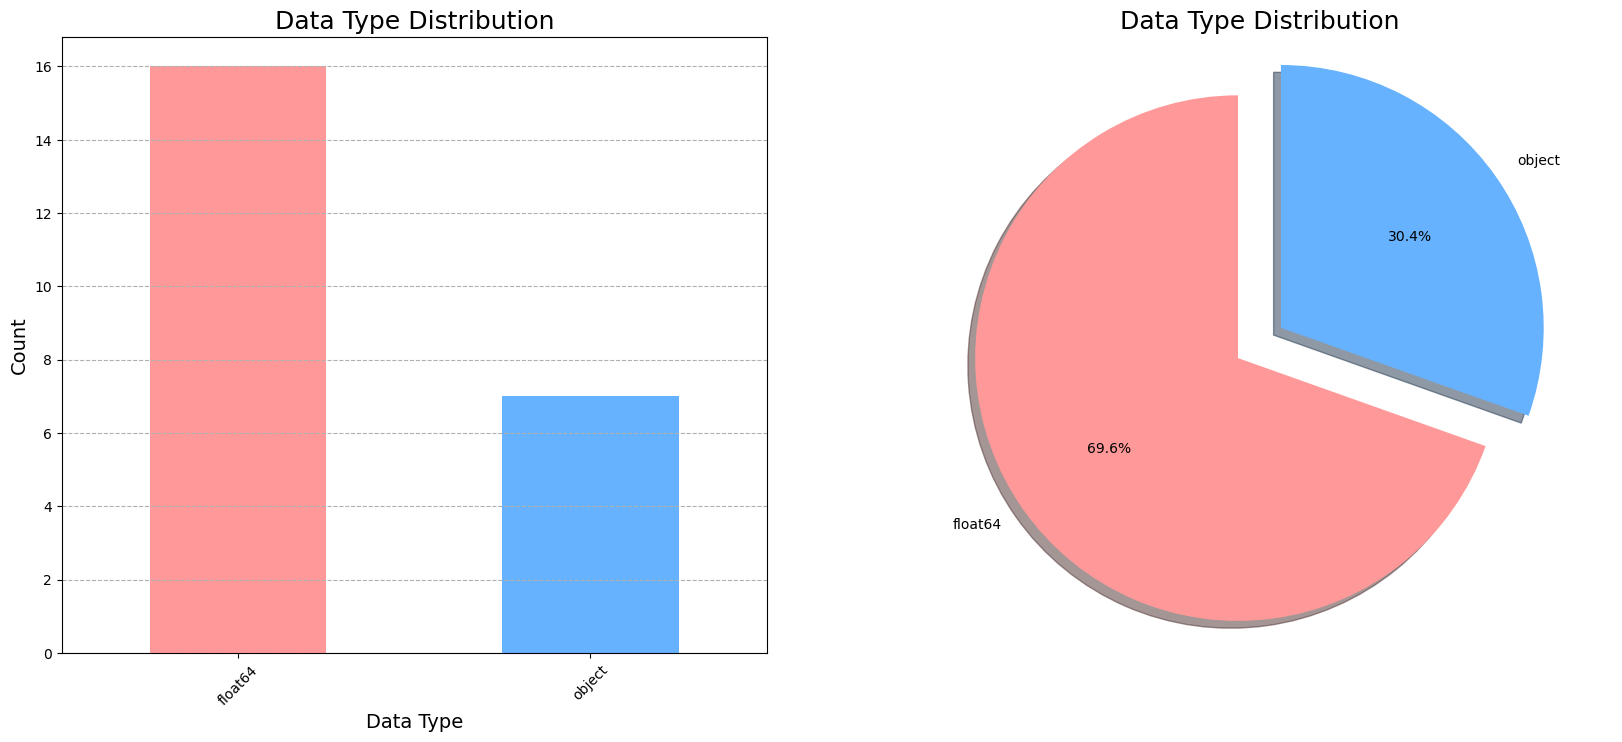

In [12]:
# Create subplots
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

# Pie chart
value_counts = df.dtypes.value_counts()
colors = ['#FF9999', '#66B2FF', '#99FF99']  # Custom colors for the pie chart

explode = [0.1] * len(value_counts)
axarr[1].pie(value_counts, labels=value_counts.index, colors=colors, explode=explode,
             autopct='%1.1f%%', shadow=True, startangle=90)
axarr[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axarr[1].set_title("Data Type Distribution", fontsize=18)

# Bar plot
value_counts.plot(kind='bar', ax=axarr[0], color=colors)
axarr[0].set_title("Data Type Distribution", fontsize=18)
axarr[0].set_xlabel("Data Type", fontsize=14)
axarr[0].set_ylabel("Count", fontsize=14)

# Customize tick labels and grid lines
axarr[0].tick_params(axis='x', labelrotation=45)
axarr[0].grid(axis='y', linestyle='--')

plt.show()

## Explore Categorical Variables

In [13]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Summary of categorical variables

- There are 6 categorical variables. They are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow
- There are two binary categorical variables - RainToday and RainTomorrow
- RainTomorrow is the target variable.

## Missing values in Categorical Variables

In [14]:
categorical.isna().sum().to_frame('number of null values')

,number of null values
Date,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


### Number of labels: cardinality
> The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may causes some serious problems in the machine learning model. So, I will check for high cardinality.

In [15]:
for var in categorical:
    print(var, ' contains ', df[var].nunique(), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  16  labels
WindDir9am  contains  16  labels
WindDir3pm  contains  16  labels
RainToday  contains  2  labels
RainTomorrow  contains  2  labels


Next, we will check if the dataset is unbalanced or balanced. If the data set is unbalanced, we need to either downsample the majority or oversample the minority to balance it.

We can observe that the presence of “0” and “1” is almost in the 75:8 ratio. So there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

## Feature Engineering of Date Variable

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Separate date feature to 3 attributes

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [18]:
# Final check
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Now, I will now check the missing data model in the dataset:

In [19]:
# create a table with data missing 
missing_values=df.isnull().sum() # missing values

percent_missing = df.isnull().sum()/df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
Date,0,0.000000,datetime64[ns]
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object


<!-- The following feature pairs have a strong correlation with each other:

     * MaxTemp and MinTemp and Temp
     * Relative_humidity(2m/%) and Precipitation(mm/day) 
     * Surface_pressure(kPa) and Wind Speed(10m/s)
     * MaxTemp and Temp3pm But in no case is the correlation value equal to a perfect “1”. We are therefore not removing any functionality

However, we can delve deeper into the pairwise correlation between these highly correlated characteristics by examining the following pair diagram. Each of the paired plots shows very clearly distinct clusters of Rain’s “yes” and “no” clusters. There is very minimal overlap between them. -->

### Explore Categorical Variables one by one

In [20]:
new_categorical = df.select_dtypes(include=['object'])
new_categorical.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [21]:
new_categorical.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

### Explore Numerical Variable

In [22]:
Numerical = df.select_dtypes(include=['float64','int'])
Numerical.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [23]:
Numerical.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

## Data Visualization

In [24]:
from IPython.core.display import display, HTML
display(HTML("<div class='tableauPlaceholder' id='viz1652712003286' style='position: relative'><noscript><a href='#'><img alt='RainFall Per Location ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RainFallinLocations&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ra&#47;RainFallinLocations&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652712003286');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>"))

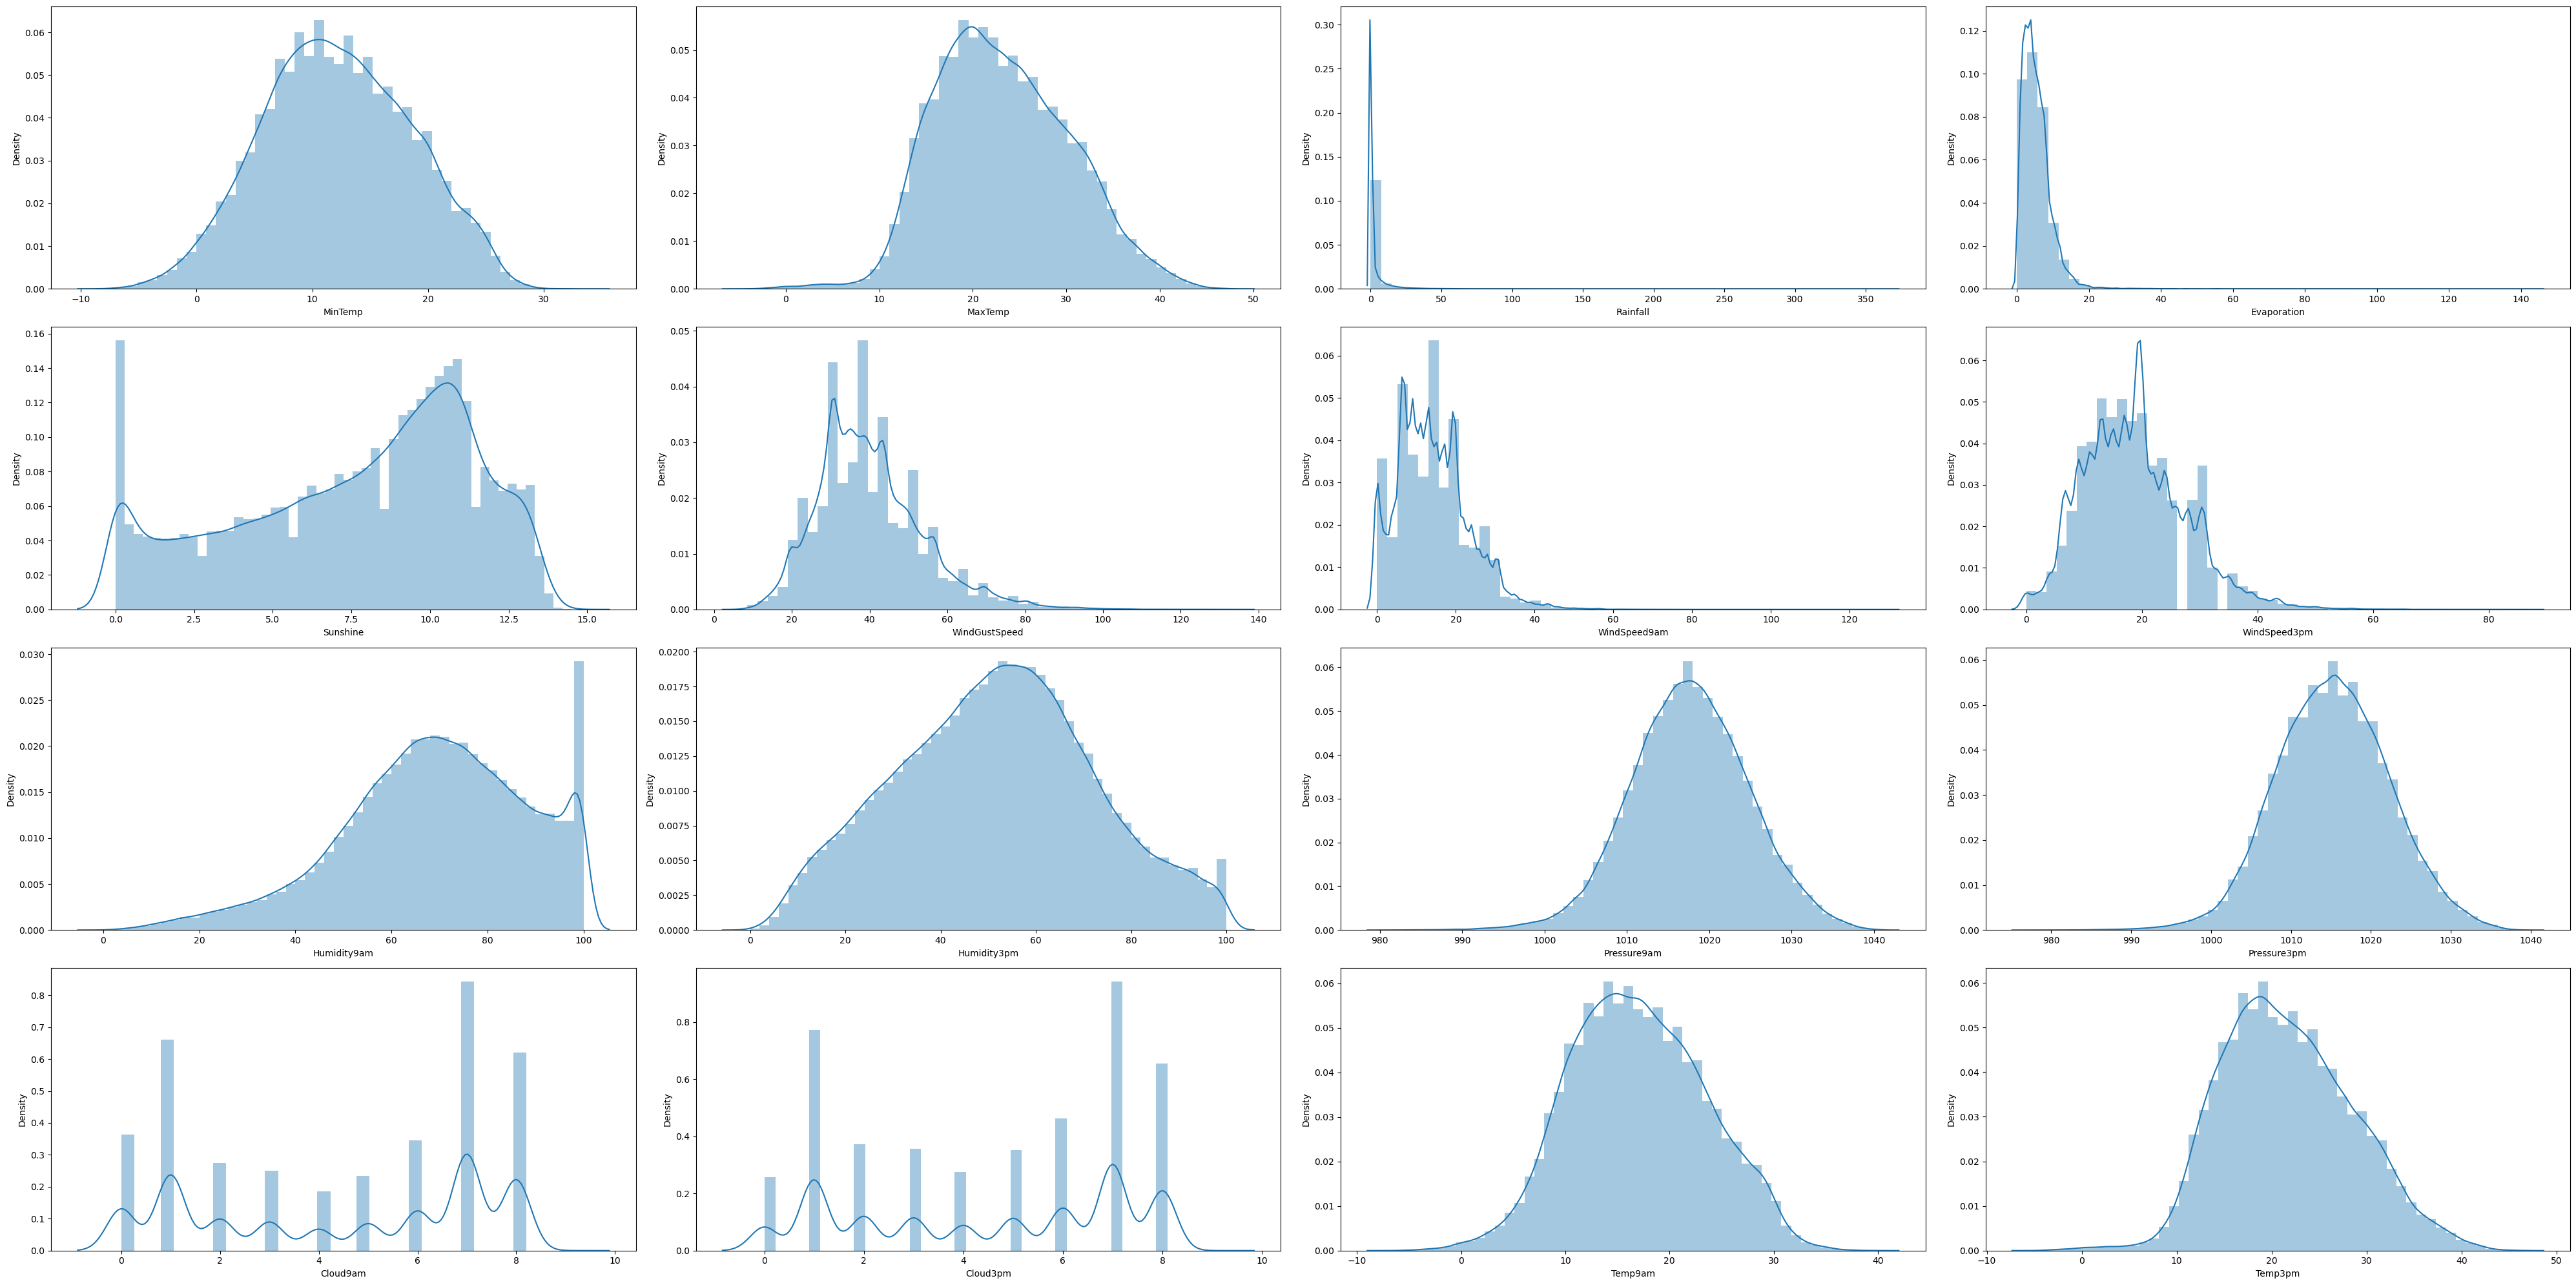

In [25]:
#  plot Numerical Data

a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(40,20))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.distplot(df[i])
        c = c+1
    else:
        continue
        
plt.tight_layout()
plt.show()       

### Date Plot

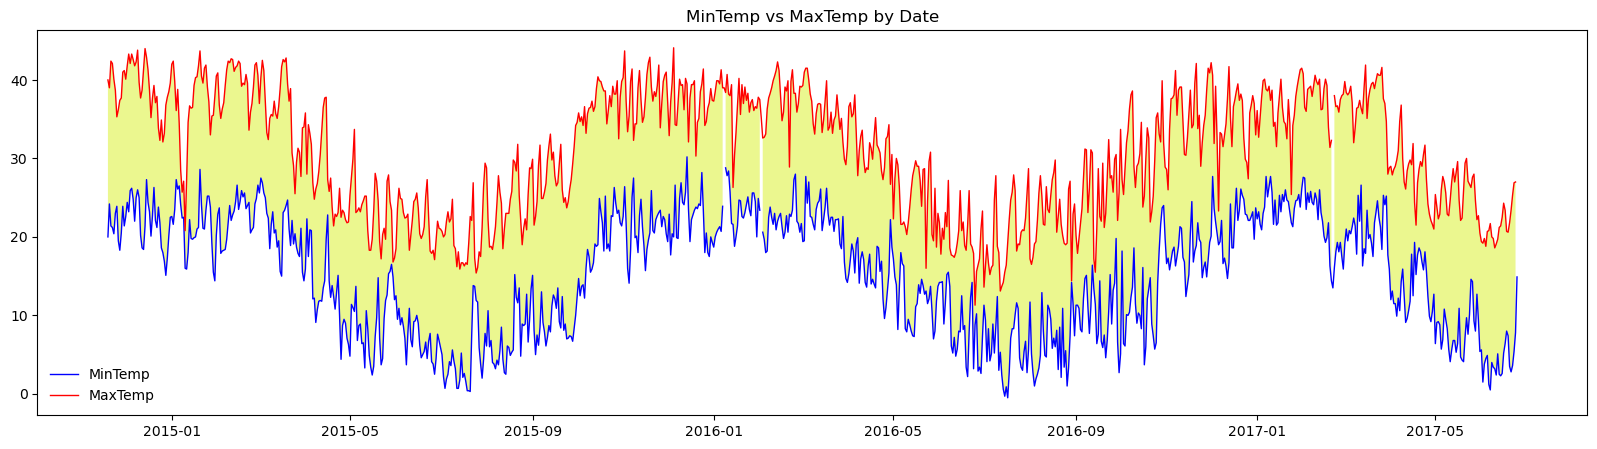

In [26]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_dateplot['Date'],df_dateplot['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_dateplot['Date'],df_dateplot['MinTemp'],df_dateplot['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

# Outliers Engineering 

- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
- We are using Boxplot to detect the outliers of each features in our dataset, where any point above or below the whiskers represent an outlier. This is also known as “Univariate method” as here we are using one variable outlier analysis.
- We can see that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns may contain outliers

In [27]:
df.drop('Date',inplace= True,axis=1)

In [28]:
# Find outliers for Rainfall variable
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > Rainfall outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for Evaporation variable
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > Evaporation outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindSpeed9am variable
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindSpeed9am outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindSpeed3pm variable
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindSpeed3pm outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

# Find outliers for WindGustSpeed variable
IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * 1.5)
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * 1.5)
print('{lowerboundary} > WindGustSpeed outliers are values > {upperboundary}'.format(lowerboundary="{:.2f}".format(Lower_fence), upperboundary="{:.2f}".format(Upper_fence)))

-1.20 > Rainfall outliers are values > 2.00
-4.60 > Evaporation outliers are values > 14.60
-11.00 > WindSpeed9am outliers are values > 37.00
-3.50 > WindSpeed3pm outliers are values > 40.50
5.50 > WindGustSpeed outliers are values > 73.50


### Important point to note :

- For Rainfall, the minimum and maximum values are 0.0 and 371.0 So, the outliers are values > 2.0
- For Evaporation, the minimum and maximum values are 0.0 and 145.0 So, the outliers are values > 14.6
- For WindSpeed9am, the minimum and maximum values are 0.0 and 130.0 So, the outliers are values > 37.0
- For WindSpeed3pm, the minimum and maximum values are 0.0 and 87.0 So, the outliers are values > 40.5
- For WindGustSpeed, the minimum and maximum values are 6.0 and 135.0 So, the outliers are values > 73.5

# Multivariante Analysis

- An important step in EDA is to discover patterns and relationships between variables in the dataset.

- I will use heatmap and pair plot to discover the patterns and relationships in the dataset.


In [29]:
correlation = df.corr()

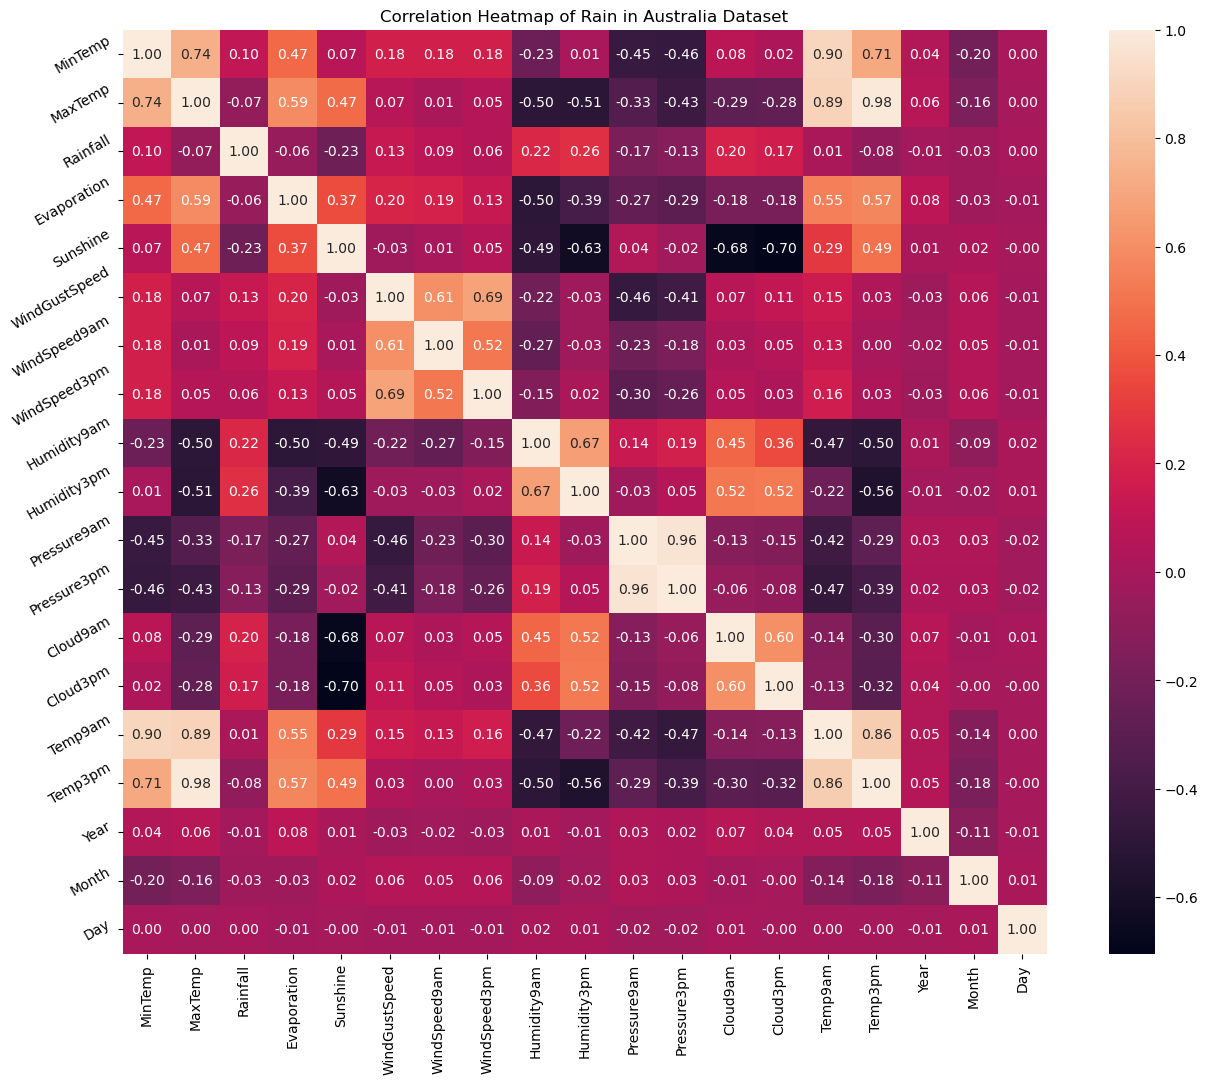

In [30]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Interpretation

From the above correlation heatmap, we can conclude that:


ㅤㅤㅤ- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

ㅤㅤㅤ- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

ㅤㅤㅤ- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

ㅤㅤㅤ- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

ㅤㅤㅤ- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

ㅤㅤㅤ- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

ㅤㅤㅤ- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

ㅤㅤㅤ- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86)

In [31]:
# Remove correlated attributes
# Remove 'Temp9am', 'Temp3pm', 'Pressure3pm' as this columns are irrelevant attributes
df.drop(['Temp9am','Temp3pm','Pressure3pm'],inplace= True,axis=1)

In [32]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

# Feature Engineering

### Declare feature vector and target variabl

In [33]:
# Display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [34]:
# Display numerical variables

numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'Year',
 'Month',
 'Day']

In [35]:
# Impute missing values in X_train and X_test with respective column median in X_train
for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 

In [36]:
# Impute missing categorical variables with most frequent value
for col in categorical:
    col_mode=df[col].mode()[0]
    #print(col_mode)
    df[col].fillna(col_mode, inplace=True) 

## Outliers Engineering in numerical variables

We have seen that Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers.
I will use top-coding approach to cap maximum values and remove outliers from the above variables.


In [37]:
for i in df:
    if df[i].dtype=='float64':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df[i])
        for j in df[i]:
            if j > Upper_tail or j < Lower_tail:
                df[i] = df[i].replace(j, med)
    else:
        continue

## Applying discretization on numeric data

In [38]:
# Main smoothing cell
# Applying discretication on numeric data

for col in numerical:
    print(col, end=' ')
    percentiles = list(df[col].describe()[3:])
    print(percentiles)
    for b in range(4):
        binn = df[col].between(percentiles[b], percentiles[b+1], inclusive='left')
        bin_mean = df[binn][col].mean()
        df.loc[binn, col] = bin_mean

MinTemp [-5.9, 7.7, 12.0, 16.8, 30.3]
MaxTemp [2.8, 18.0, 22.6, 28.1, 43.5]
Rainfall [0.0, 0.0, 0.0, 0.0, 1.5]
Evaporation [2.2, 4.8, 4.8, 4.8, 7.0]
Sunshine [7.5, 8.4, 8.4, 8.4, 9.4]
WindGustSpeed [9.0, 31.0, 39.0, 44.0, 67.0]
WindSpeed9am [0.0, 7.0, 13.0, 19.0, 37.0]
WindSpeed3pm [0.0, 13.0, 19.0, 24.0, 39.0]
Humidity9am [18.0, 58.0, 70.0, 83.0, 100.0]
Humidity3pm [0.0, 37.0, 52.0, 65.0, 100.0]
Pressure9am [1001.1, 1013.8, 1017.6, 1021.6, 1034.2]
Cloud9am [0.0, 3.0, 5.0, 6.0, 9.0]
Cloud3pm [1.0, 5.0, 5.0, 6.0, 9.0]
Year [2007.0, 2011.0, 2013.0, 2015.0, 2017.0]
Month [1.0, 3.0, 6.0, 9.0, 12.0]
Day [1.0, 8.0, 16.0, 23.0, 31.0]


In [39]:
# Checking

for col in numerical:
    print(col, df[col].unique())

MinTemp [14.15432856  4.13471716  9.83066984 20.46282429 30.3       ]
MaxTemp [25.0506269  32.55346701 20.22992164 14.74096534 43.5       ]
Rainfall [0.0831257 1.5      ]
Evaporation [4.94532217 3.37767061 7.        ]
Sunshine [8.42551684 7.91641627 9.4       ]
WindGustSpeed [51.6074521  24.79419123 40.06784584 34.00413407 67.        ]
WindSpeed9am [23.60481437  3.09954218  9.0522677  14.68905557 37.        ]
WindSpeed3pm [28.3233484  20.00936516  8.06462756 14.99775969 39.        ]
Humidity9am [ 75.13713091  45.25781624  63.76788339  91.04329334 100.        ]
Humidity3pm [ 24.48573224  77.06422141  44.44172156  57.17401139 100.        ]
Pressure9am [1009.82737026 1018.74797887 1015.69726557 1025.67617643 1034.2       ]
Cloud9am [7.15233427 5.         0.93051996 3.42771434 9.        ]
Cloud3pm [5.         2.0751633  7.09235709 9.        ]
Year [2009.40081333 2011.50003245 2013.52142857 2015.50068399 2017.        ]
Month [12.          1.44916559  3.99979093  6.98214334 10.00082067]
Day 

## Feature Encoding

In [40]:
new_categorical.columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [41]:
# Dummies of Locations

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Dummies of WindGustDir

pd.get_dummies(df.WindGustDir,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
# Dummies of WindDir9am

pd.get_dummies(df.WindDir9am,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
# Dummies of WindDir3pm

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [45]:
# Dummies for RainToday

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [46]:
# Spliting data to X and Y : Features and Target

X = df.drop(['RainTomorrow'], axis=1)
Y = df['RainTomorrow']

In [47]:
# Getting Dummies for Target feature

Y_dumies = pd.get_dummies(Y, drop_first=True)

In [48]:
# Encoding the Target feature

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_coded = encoder.fit_transform(X)

In [49]:
X_coded.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday_0,RainToday_1,Year,Month,Day
0,Albury,14.154329,25.050627,0.083126,4.945322,8.425517,W,51.607452,W,WNW,...,75.137131,24.485732,1009.827370,7.152334,5.000000,0,1,2009.400813,12.0,4.0
1,Albury,4.134717,25.050627,0.083126,4.945322,8.425517,WNW,51.607452,NNW,WSW,...,45.257816,24.485732,1009.827370,5.000000,5.000000,0,1,2009.400813,12.0,4.0
2,Albury,14.154329,25.050627,0.083126,4.945322,8.425517,WSW,51.607452,W,WSW,...,45.257816,24.485732,1009.827370,5.000000,2.075163,0,1,2009.400813,12.0,4.0
3,Albury,9.830670,25.050627,0.083126,4.945322,8.425517,NE,24.794191,SE,E,...,45.257816,24.485732,1018.747979,5.000000,5.000000,0,1,2009.400813,12.0,4.0
4,Albury,20.462824,32.553467,0.083126,4.945322,8.425517,W,40.067846,ENE,NW,...,75.137131,24.485732,1009.827370,7.152334,7.092357,0,1,2009.400813,12.0,4.0


In [50]:
X_conc = pd.get_dummies(X_coded)

In [51]:
# Drop the columns 'Year', 'Month', and 'Day'
columns_to_drop = ['Year', 'Month', 'Day']
X_conc = X_conc.drop(columns=columns_to_drop)

In [52]:
X_conc.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,14.154329,25.050627,0.083126,4.945322,8.425517,51.607452,23.604814,28.323348,75.137131,24.485732,...,0,0,0,0,0,0,0,0,1,0
1,4.134717,25.050627,0.083126,4.945322,8.425517,51.607452,3.099542,20.009365,45.257816,24.485732,...,0,0,0,0,0,0,0,0,0,1
2,14.154329,25.050627,0.083126,4.945322,8.425517,51.607452,23.604814,28.323348,45.257816,24.485732,...,0,0,0,0,0,0,0,0,0,1
3,9.830670,25.050627,0.083126,4.945322,8.425517,24.794191,9.052268,8.064628,45.257816,24.485732,...,0,0,0,0,0,0,0,0,0,0
4,20.462824,32.553467,0.083126,4.945322,8.425517,40.067846,9.052268,20.009365,75.137131,24.485732,...,0,1,0,0,0,0,0,0,0,0


## Feature Selection for Rainfall Prediction

- Selection of features by wrapping method (random forest):

In [53]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = X_conc  # Features
y = Y_dumies

selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)

['MinTemp', 'MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday_0', 'RainToday_1', 'WindGustDir_W', 'WindDir9am_N']


## Training Rainfall Prediction Model with Different Models
We will divide the dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. For best results, we will standardize our X_train and X_test data:

In [54]:
from sklearn.metrics import auc
def plot_roc_curve(fper, tper):
    roc_auc = auc(fper, tper)

    plt.figure(figsize=(8, 6))
    plt.plot(fper, tper, color='orange', label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [55]:
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,cohen_kappa_score

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()

    if not verbose:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - t0
    
    print("Evaluation Metrics:")
    print("-" * 50)
    print("Accuracy: {:.4f}".format(accuracy))
    print("ROC AUC: {:.4f}".format(roc_auc))
    print("Cohen's Kappa: {:.4f}".format(coh_kap))
    print("Time Taken: {:.2f} seconds".format(time_taken))
    print()

    print("Classification Report:")
    print("-" * 50)
    print(classification_report(y_test, y_pred, digits=4))
    print()
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_curve(fper, tper)

    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.title('Confusion Matrix')
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken

# Model Design With Selected Features

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Standarize data Scale
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scale = Scaler.fit_transform(X_conc)
X_scale = pd.DataFrame(X_scale, columns=[X_conc.columns])

In [58]:
X_scale

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.327035,0.276278,-0.009811,0.403822,0.110003,1.311549,1.305612,1.345452,0.335201,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,3.923226,-0.264604
1,-1.349377,0.276278,-0.009811,0.403822,0.110003,1.311549,-1.381024,0.239360,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,3.779236
2,0.327035,0.276278,-0.009811,0.403822,0.110003,1.311549,1.305612,1.345452,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,3.779236
3,-0.396370,0.276278,-0.009811,0.403822,0.110003,-1.377872,-0.601088,-1.349769,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
4,1.382528,1.422740,-0.009811,0.403822,0.110003,0.154105,-0.601088,0.239360,0.335201,-1.406237,...,-0.239163,3.986767,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,-1.349377,0.276278,-0.009811,0.403822,0.110003,-0.454097,0.137454,-1.349769,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
145456,-1.349377,0.276278,-0.009811,0.403822,0.110003,-1.377872,0.137454,-1.349769,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604
145457,-1.349377,0.276278,-0.009811,0.403822,0.110003,-0.454097,-0.601088,-1.349769,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,3.923226,-0.264604
145458,-0.396370,0.276278,-0.009811,0.403822,0.110003,-1.377872,0.137454,-1.349769,-1.429754,-1.406237,...,-0.239163,-0.250830,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604


In [95]:
selected_cols = ['MinTemp', 'MaxTemp', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday_0', 'RainToday_1', 'WindGustDir_W', 'WindDir9am_N']
features = X_conc[selected_cols]
X_train, X_test, y_train, y_test = train_test_split(features, Y_dumies, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

,MinTemp,MaxTemp,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday_0,RainToday_1,WindGustDir_W,WindDir9am_N
22926,20.462824,25.050627,4.945322,51.607452,23.604814,28.323348,75.137131,77.064221,1015.697266,5.000000,7.092357,0,1,0,0
80735,9.830670,25.050627,4.945322,51.607452,14.689056,28.323348,75.137131,57.174011,1018.747979,3.427714,5.000000,0,1,0,0
121764,9.830670,20.229922,4.945322,24.794191,3.099542,8.064628,91.043293,44.441722,1018.747979,0.930520,2.075163,1,0,0,1
139821,20.462824,32.553467,4.945322,40.067846,23.604814,14.997760,45.257816,44.441722,1015.697266,0.930520,2.075163,0,1,0,0
1867,14.154329,14.740965,4.945322,24.794191,9.052268,14.997760,100.000000,100.000000,1015.697266,7.152334,7.092357,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,20.462824,32.553467,4.945322,40.067846,9.052268,14.997760,63.767883,24.485732,1015.697266,0.930520,2.075163,0,1,0,0
97639,14.154329,25.050627,4.945322,24.794191,3.099542,14.997760,63.767883,24.485732,1018.747979,5.000000,5.000000,0,1,1,1
95939,20.462824,32.553467,4.945322,24.794191,3.099542,14.997760,75.137131,57.174011,1018.747979,5.000000,5.000000,0,1,0,0
117952,9.830670,20.229922,4.945322,34.004134,23.604814,28.323348,45.257816,44.441722,1018.747979,7.152334,7.092357,1,0,0,0


Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8244
ROC AUC: 0.6724
Cohen's Kappa: 0.4016
Time Taken: 105.10 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8491    0.9428    0.8935     22726
           1     0.6630    0.4020    0.5005      6366

    accuracy                         0.8244     29092
   macro avg     0.7560    0.6724    0.6970     29092
weighted avg     0.8084    0.8244    0.8075     29092




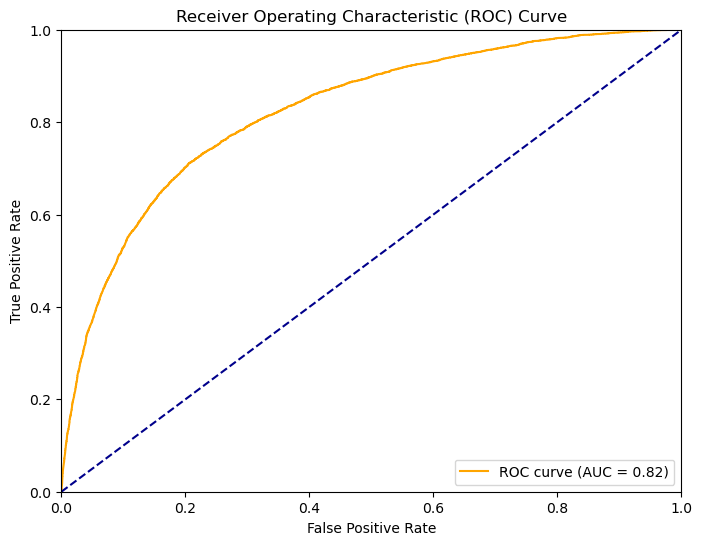

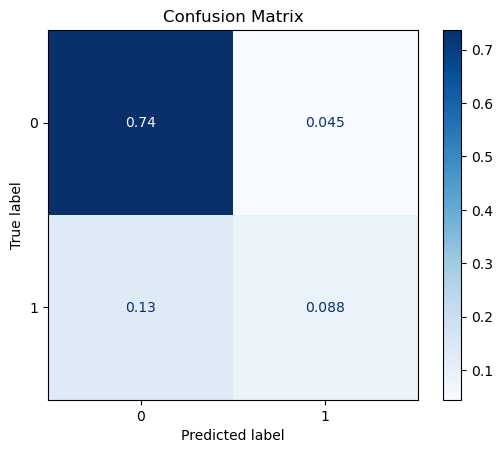

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8108
ROC AUC: 0.6697
Cohen's Kappa: 0.3802
Time Taken: 0.22 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8498    0.9205    0.8837     22726
           1     0.5962    0.4189    0.4921      6366

    accuracy                         0.8108     29092
   macro avg     0.7230    0.6697    0.6879     29092
weighted avg     0.7943    0.8108    0.7980     29092




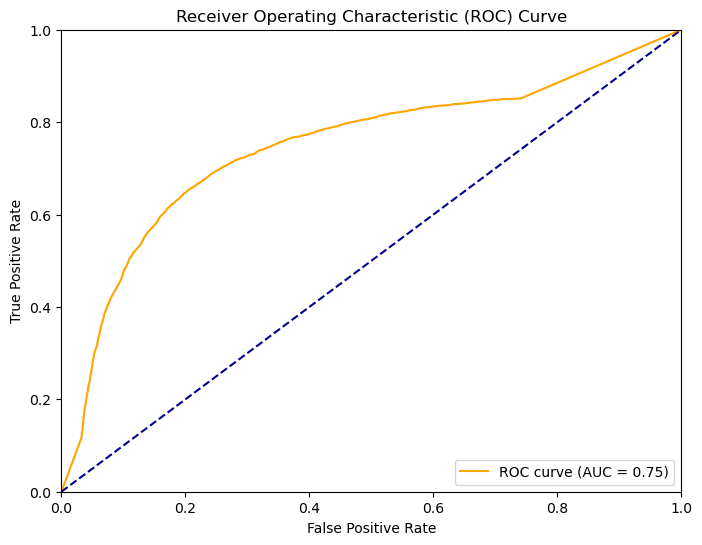

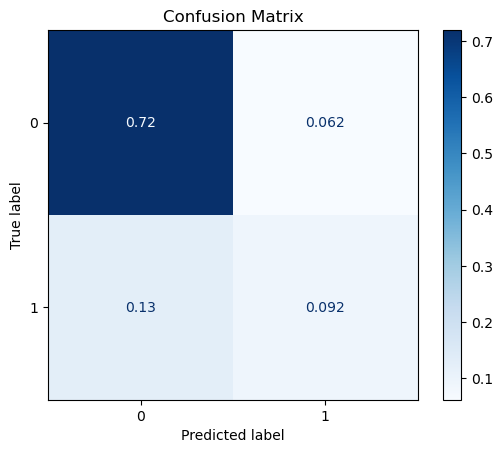

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8308
ROC AUC: 0.6869
Cohen's Kappa: 0.4303
Time Taken: 14.49 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8554    0.9428    0.8970     22726
           1     0.6786    0.4309    0.5271      6366

    accuracy                         0.8308     29092
   macro avg     0.7670    0.6869    0.7120     29092
weighted avg     0.8167    0.8308    0.8160     29092




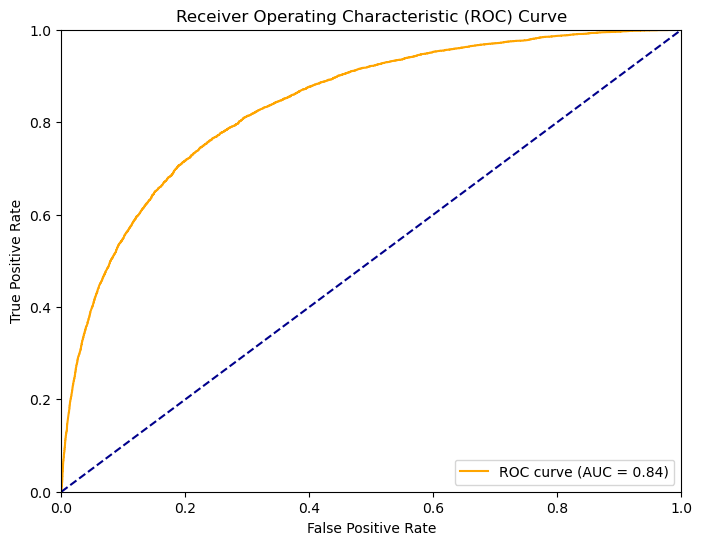

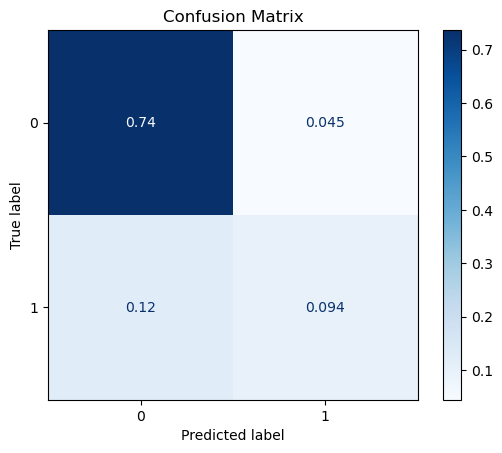

In [62]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8322
ROC AUC: 0.6961
Cohen's Kappa: 0.4442
Time Taken: 3.55 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8598    0.9382    0.8973     22726
           1     0.6729    0.4540    0.5422      6366

    accuracy                         0.8322     29092
   macro avg     0.7663    0.6961    0.7197     29092
weighted avg     0.8189    0.8322    0.8196     29092




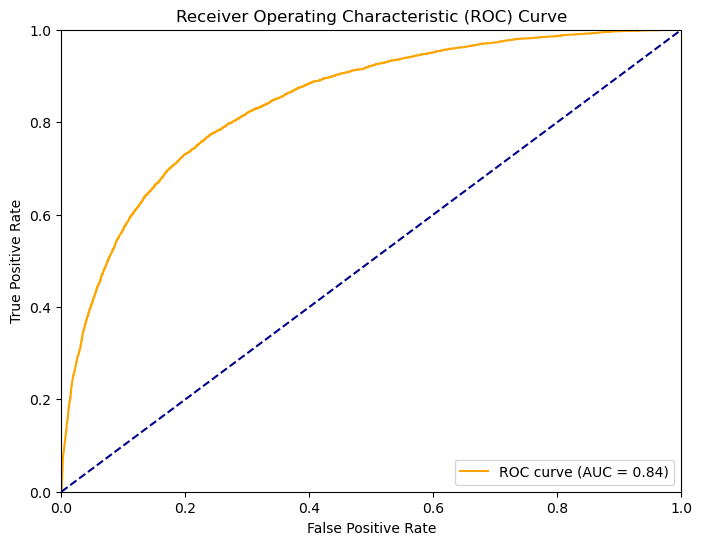

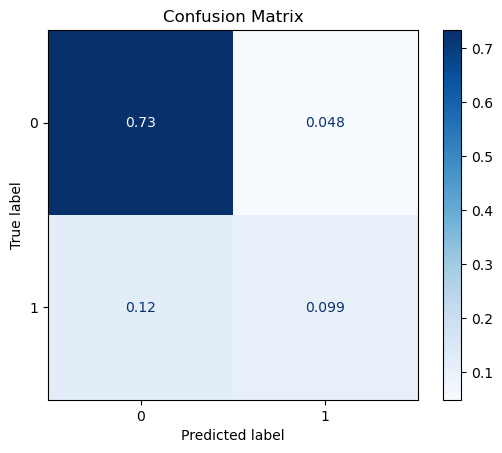

In [63]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8305
ROC AUC: 0.6873
Cohen's Kappa: 0.4304
Time Taken: 1.49 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8556    0.9420    0.8967     22726
           1     0.6762    0.4326    0.5276      6366

    accuracy                         0.8305     29092
   macro avg     0.7659    0.6873    0.7122     29092
weighted avg     0.8164    0.8305    0.8160     29092




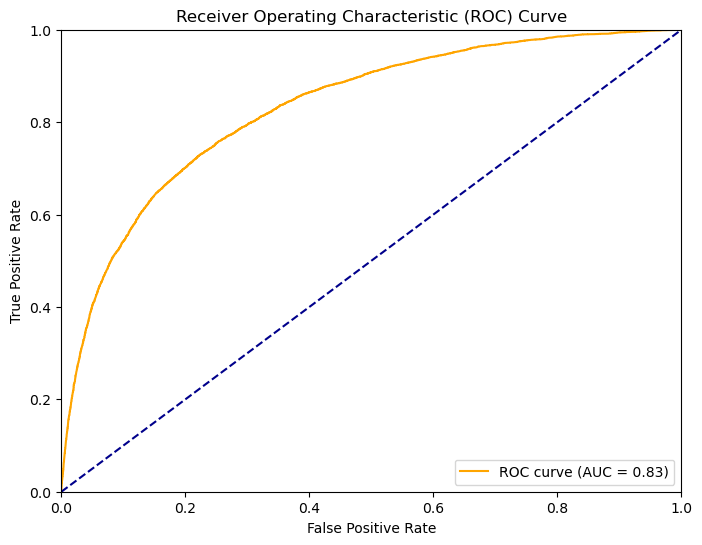

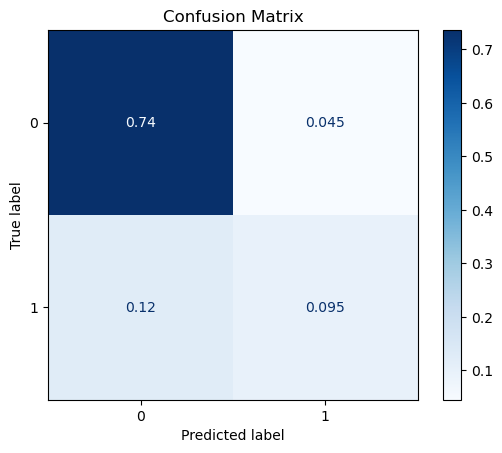

In [64]:
# Catboost
# !pip install catboost
import catboost as cb
params_cb ={'iterations': 5,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8241
ROC AUC: 0.6884
Cohen's Kappa: 0.4227
Time Taken: 2.92 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8572    0.9297    0.8920     22726
           1     0.6404    0.4471    0.5265      6366

    accuracy                         0.8241     29092
   macro avg     0.7488    0.6884    0.7093     29092
weighted avg     0.8098    0.8241    0.8120     29092




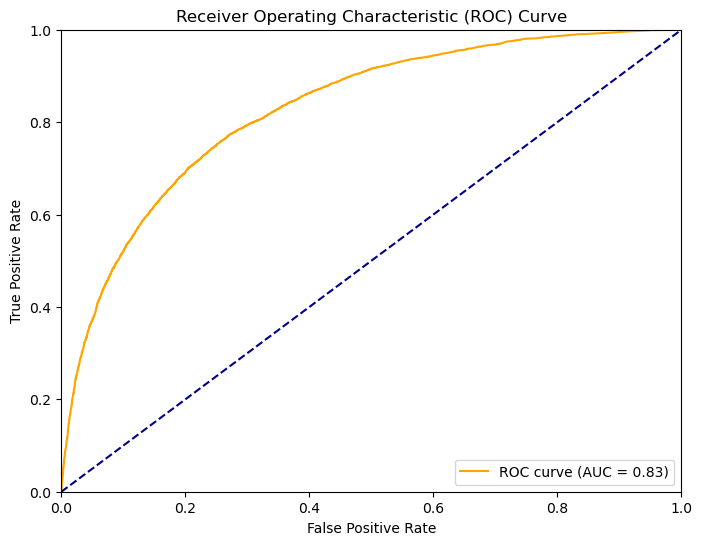

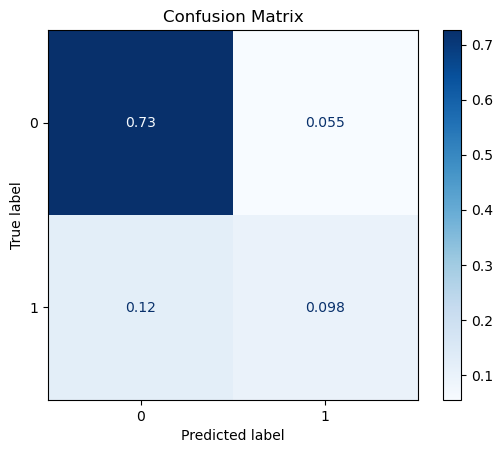

In [65]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 5,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

## Hyperparameters Tuning

- I will use GridSearchCV to find the best hyperparameters.
- Cross-Validation (CV): Number of cross-validation you have to try for each selected set of hyperparameters.
- Verbose: You can set it to 1 to get the detailed print out while you fit the data to GridSearchCV at the end, you can select the best parameters from the listed hyperparameters

In [68]:
# Assume values for some paramaters
grid_time_s = time.time()
tree_params = param_dist = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth" : [33, 40, None],
    'max_features' : ['sqrt', 'log2']
}
# apply gridsearch model 
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 4)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_
grid_time_e = time.time()
grid_time = grid_time_e-grid_time_s
print("time taken in training:",grid_time)

time taken in training: 10.170928239822388


In [69]:
y_pred = tree_grid.predict(X_test)
best_score = tree_grid.best_score_
best_params = tree_grid.best_params_
grid_precision = precision_score(y_test, y_pred)
grid_roc = roc_auc_score(y_test, y_pred)
grid_recall = recall_score(y_test, y_pred)
grid_cm = confusion_matrix(y_test, y_pred)
grid_coh_kap = cohen_kappa_score(y_test, y_pred)

In [70]:
GridSearchCV_accuracy = tree_grid.score(X_train, y_train)
print(f'Accuracy =:',GridSearchCV_accuracy)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', grid_roc)
print ('--')
print ('Recall Score is ', grid_recall)
print ('--')
print ('Confusion Matrix\n\n', grid_cm)
print ('--')
print("Cohen's Kappa = {}".format(grid_coh_kap))

Accuracy =: 0.9522721022961639
--
Best Parameters is {'criterion': 'entropy', 'max_depth': 40, 'max_features': 'log2'}
--
ROC Score is 0.6522451113372937
--
Recall Score is  0.4277411247251021
--
Confusion Matrix

 [[19925  2801]
 [ 3643  2723]]
--
Cohen's Kappa = 0.31971087138826915


## Rainfall Prediction Model Comparison
Now we need to decide which model performed best based on Precision Score, ROC_AUC, Cohen’s Kappa and Total Run Time. One point to mention here is: we could have considered F1-Score as a better metric for judging model performance instead of accuracy, but we have already converted the unbalanced dataset to a balanced one, so consider accuracy as a metric for deciding the best model is justified in this case.

For a better decision, we chose “Cohen’s Kappa” which is actually an ideal choice as a metric to decide on the best model in case of unbalanced datasets. Let’s check which model worked well on which front:

In [71]:
# Create a DataFrame with the model data
model_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'Catboost', 'XGBoost','GridSearchCV'],
    'Accuracy': [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_lgb,accuracy_cb,accuracy_xgb,GridSearchCV_accuracy],
    'ROC_AUC': [roc_auc_lr,roc_auc_dt,roc_auc_rf,roc_auc_lgb,roc_auc_cb,roc_auc_xgb,grid_roc],
    'Cohen_Kappa': [coh_kap_lr,coh_kap_dt,coh_kap_rf,coh_kap_lgb,coh_kap_cb,coh_kap_xgb,grid_coh_kap],
    'Time taken': [tt_lr,tt_dt,tt_rf,tt_lgb,tt_cb,tt_xgb,grid_time]
}
data = pd.DataFrame(model_data)
print("Model Performance with All Features:")
data

Model Performance with All Features:


,Model,Accuracy,ROC_AUC,Cohen_Kappa,Time taken
0,Logistic Regression,0.824419,0.672366,0.401641,105.100698
1,Decision Tree,0.810773,0.669738,0.380166,0.224821
2,Random Forest,0.830813,0.686862,0.430260,14.485490
3,LightGBM,0.832222,0.696075,0.444160,3.549509
4,Catboost,0.830503,0.687286,0.430368,1.485489
5,XGBoost,0.824075,0.688373,0.422680,2.923562
6,GridSearchCV,0.952272,0.652245,0.319711,10.170928


In [72]:
import plotly.express as px
# Create interactive bar plot
fig = px.bar(data, x='Model', y='Time taken', color='Accuracy', title='Model Comparison: Accuracy and Time taken for execution',
             labels={'Model': 'Model', 'Time taken': 'Time taken', 'Accuracy': 'Accuracy'},
             template='plotly_dark')
fig.update_layout(xaxis=dict(tickfont=dict(size=12)), yaxis=dict(tickfont=dict(size=12)))
fig.show()

# Create interactive line plot
fig = px.line(data, x='Model', y='Accuracy', title='Model Comparison: Accuracy',
              labels={'Model': 'Model', 'Accuracy': 'Accuracy'},
              template='plotly_dark')
fig.update_layout(xaxis=dict(tickfont=dict(size=12)), yaxis=dict(tickfont=dict(size=12)))
fig.show()

In [73]:
import plotly.graph_objects as go
import plotly.express as px

# Create the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Model'],
    y=data['ROC_AUC'],
    name='ROC_AUC',
    marker_color='blue'
))

# Create the line plot overlay
fig.add_trace(go.Scatter(
    x=data['Model'],
    y=data['Cohen_Kappa'],
    name='Cohen_Kappa',
    mode='lines',
    line=dict(color='red')
))

# Set the layout
fig.update_layout(
    title='Model Comparison: Area under ROC and Cohen\'s Kappa',
    xaxis=dict(title='Model', tickfont=dict(size=13)),
    yaxis=dict(title='ROC_AUC', tickfont=dict(size=13)),
    yaxis2=dict(title='Cohen_Kappa', tickfont=dict(size=13), overlaying='y', side='right'),
    legend=dict(x=0.85, y=1.1),
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show the interactive plot
fig.show()

In [107]:
# print the best model name
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb,GridSearchCV_accuracy]
labels = ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost','Grid-Search']
best_model = labels[accuracy_scores.index(max(accuracy_scores))]
#print the best model name with accuracy
print("The best model is", best_model, "with accuracy of", round(max(accuracy_scores)*100,2))

The best model is Grid-Search with accuracy of 95.23


# Model Design With All Features

In [92]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_dumies, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8304
ROC AUC: 0.6895
Cohen's Kappa: 0.4332
Time Taken: 163.70 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8568    0.9400    0.8965     22726
           1     0.6722    0.4391    0.5312      6366

    accuracy                         0.8304     29092
   macro avg     0.7645    0.6895    0.7138     29092
weighted avg     0.8164    0.8304    0.8165     29092




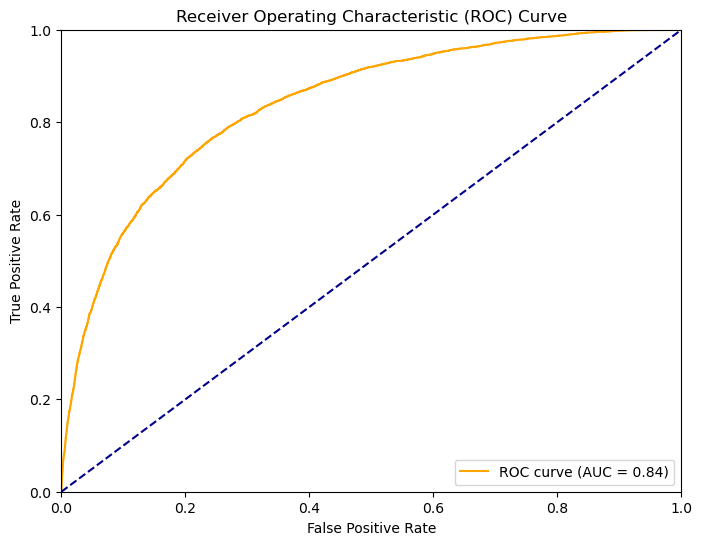

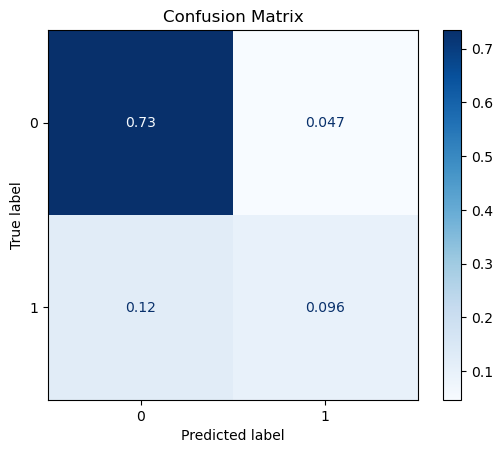

In [76]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8165
ROC AUC: 0.6740
Cohen's Kappa: 0.3933
Time Taken: 0.38 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8511    0.9274    0.8876     22726
           1     0.6186    0.4207    0.5008      6366

    accuracy                         0.8165     29092
   macro avg     0.7348    0.6740    0.6942     29092
weighted avg     0.8002    0.8165    0.8029     29092




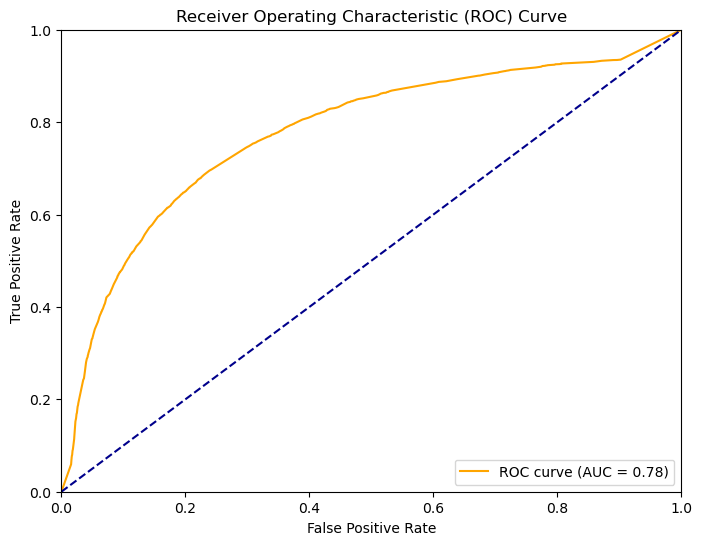

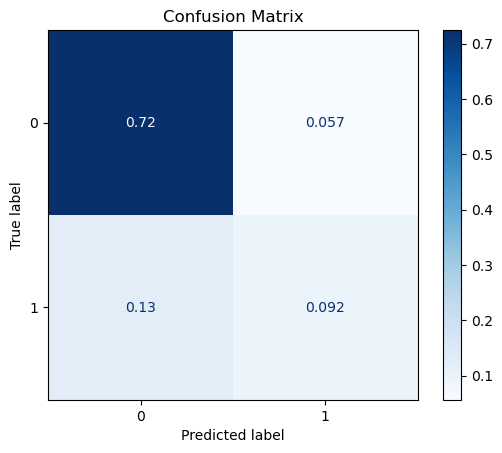

In [77]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8342
ROC AUC: 0.6775
Cohen's Kappa: 0.4227
Time Taken: 23.24 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8502    0.9563    0.9001     22726
           1     0.7186    0.3987    0.5128      6366

    accuracy                         0.8342     29092
   macro avg     0.7844    0.6775    0.7065     29092
weighted avg     0.8214    0.8342    0.8154     29092




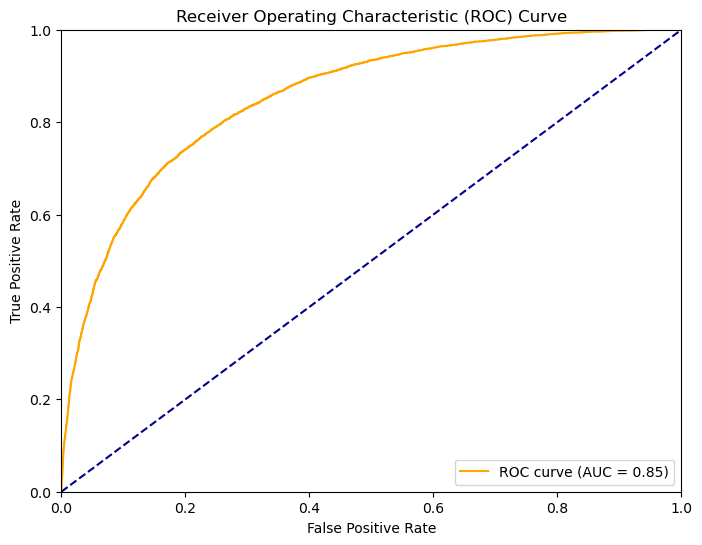

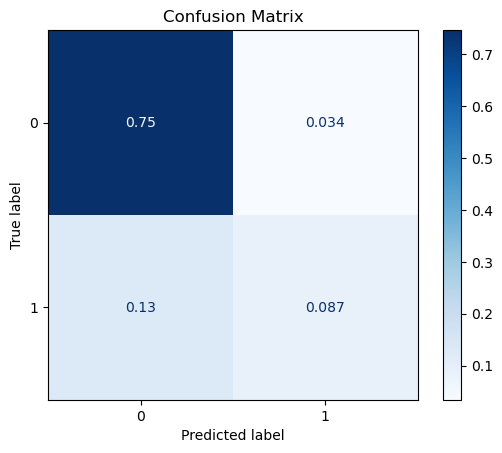

In [78]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

In [86]:
  y_train#X_train

,Yes
22926,1
80735,0
121764,0
139821,0
1867,1
...,...
41993,0
97639,0
95939,0
117952,0


Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8417
ROC AUC: 0.7187
Cohen's Kappa: 0.4857
Time Taken: 6.41 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8700    0.9374    0.9024     22726
           1     0.6911    0.5000    0.5802      6366

    accuracy                         0.8417     29092
   macro avg     0.7805    0.7187    0.7413     29092
weighted avg     0.8308    0.8417    0.8319     29092




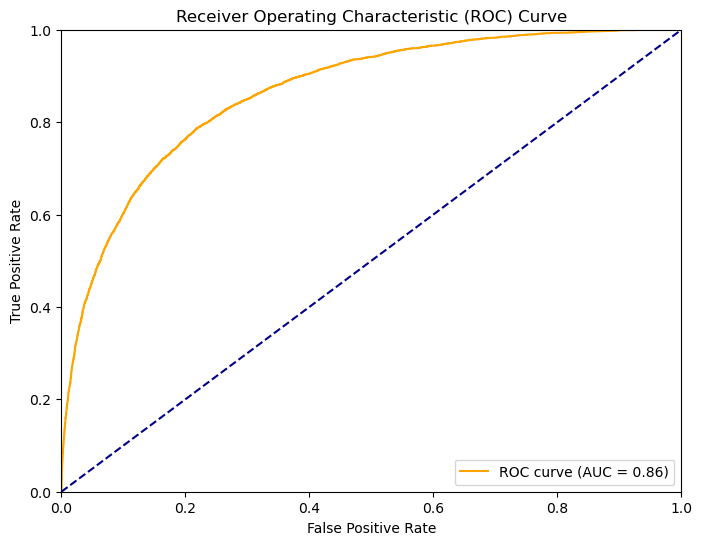

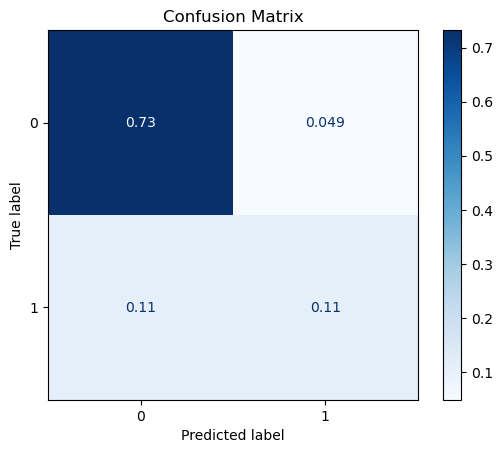

In [90]:
# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8305
ROC AUC: 0.6873
Cohen's Kappa: 0.4304
Time Taken: 1.00 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8556    0.9420    0.8967     22726
           1     0.6762    0.4326    0.5276      6366

    accuracy                         0.8305     29092
   macro avg     0.7659    0.6873    0.7122     29092
weighted avg     0.8164    0.8305    0.8160     29092




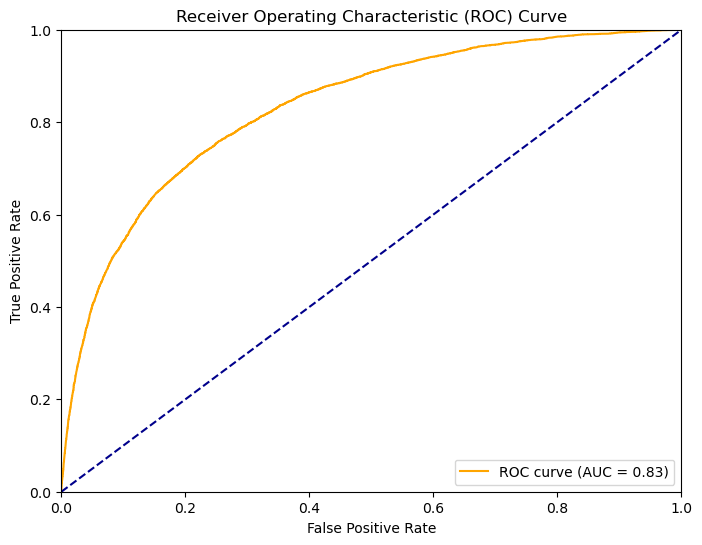

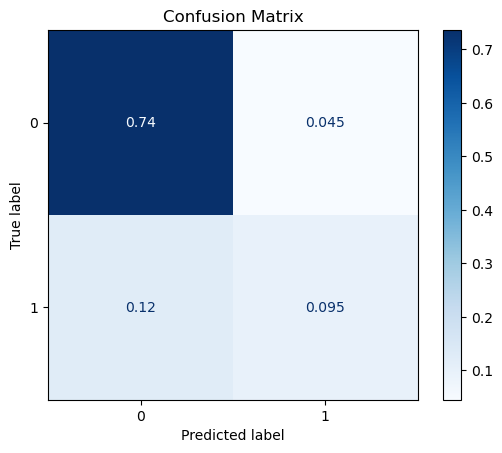

In [96]:
# Catboost
# !pip install catboost
import catboost as cb
params_cb ={'iterations': 5,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

Evaluation Metrics:
--------------------------------------------------
Accuracy: 0.8241
ROC AUC: 0.6884
Cohen's Kappa: 0.4227
Time Taken: 2.87 seconds

Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8572    0.9297    0.8920     22726
           1     0.6404    0.4471    0.5265      6366

    accuracy                         0.8241     29092
   macro avg     0.7488    0.6884    0.7093     29092
weighted avg     0.8098    0.8241    0.8120     29092




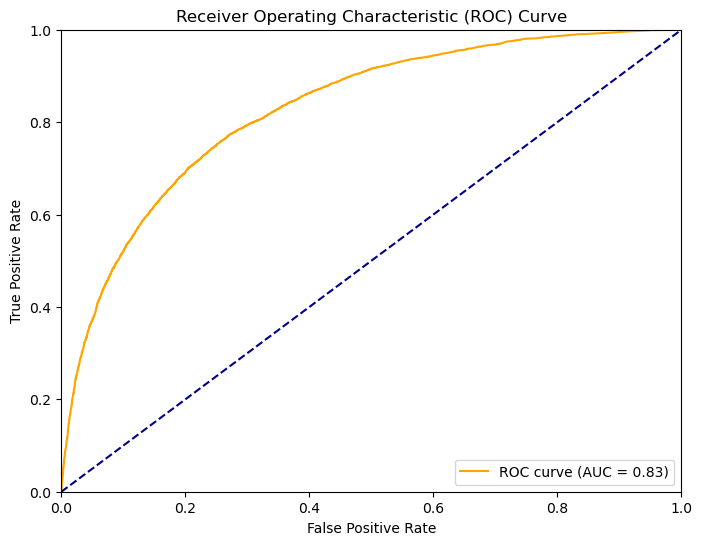

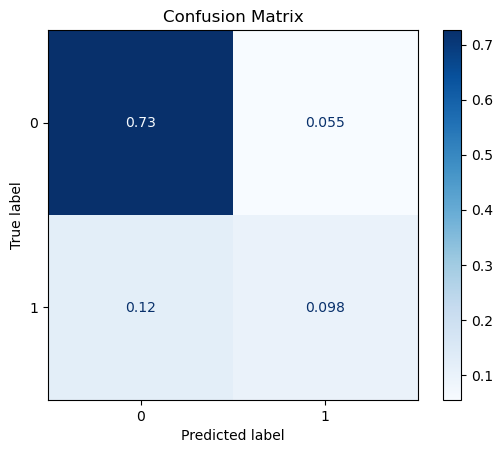

In [97]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 5,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

## Hyperparameters Tuning

- I will use GridSearchCV to find the best hyperparameters.
- Cross-Validation (CV): Number of cross-validation you have to try for each selected set of hyperparameters.
- Verbose: You can set it to 1 to get the detailed print out while you fit the data to GridSearchCV at the end, you can select the best parameters from the listed hyperparameters

In [98]:
# Assume values for some paramaters
grid_time_s = time.time()
tree_params = param_dist = {
    "criterion" : ['gini', 'entropy', 'log_loss'],
    "max_depth" : [33, 40, None],
    'max_features' : ['sqrt', 'log2']
}
# apply gridsearch model 
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, scoring = 'accuracy',cv = 4)
tree_grid.fit(X_train, y_train)
tree_grid.best_estimator_
grid_time_e = time.time()
grid_time = grid_time_e-grid_time_s
print("time taken in training:",grid_time)

time taken in training: 8.800631284713745


In [99]:
y_pred = tree_grid.predict(X_test)
best_score = tree_grid.best_score_
best_params = tree_grid.best_params_
grid_precision = precision_score(y_test, y_pred)
grid_roc = roc_auc_score(y_test, y_pred)
grid_recall = recall_score(y_test, y_pred)
grid_cm = confusion_matrix(y_test, y_pred)
grid_coh_kap = cohen_kappa_score(y_test, y_pred)

In [100]:
GridSearchCV_accuracy = tree_grid.score(X_train, y_train)
print(f'Accuracy =:',GridSearchCV_accuracy)
print ('--')
print ('Best Parameters is', best_params)
print ('--')
print ('ROC Score is', grid_roc)
print ('--')
print ('Recall Score is ', grid_recall)
print ('--')
print ('Confusion Matrix\n\n', grid_cm)
print ('--')
print("Cohen's Kappa = {}".format(grid_coh_kap))

Accuracy =: 0.9522721022961639
--
Best Parameters is {'criterion': 'gini', 'max_depth': 33, 'max_features': 'log2'}
--
ROC Score is 0.6489711787039464
--
Recall Score is  0.42255733584668553
--
Confusion Matrix

 [[19894  2832]
 [ 3676  2690]]
--
Cohen's Kappa = 0.31287284478522426


## Rainfall Prediction Model Comparison

In [101]:
# Create a DataFrame with the model data
model_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'LightGBM', 'Catboost', 'XGBoost','GridSearchCV'],
    'Accuracy': [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_lgb,accuracy_cb,accuracy_xgb,GridSearchCV_accuracy],
    'ROC_AUC': [roc_auc_lr,roc_auc_dt,roc_auc_rf,roc_auc_lgb,roc_auc_cb,roc_auc_xgb,grid_roc],
    'Cohen_Kappa': [coh_kap_lr,coh_kap_dt,coh_kap_rf,coh_kap_lgb,coh_kap_cb,coh_kap_xgb,grid_coh_kap],
    'Time taken': [tt_lr,tt_dt,tt_rf,tt_lgb,tt_cb,tt_xgb,grid_time]
}
data = pd.DataFrame(model_data)
print("Model Performance with All Features:")
data

Model Performance with All Features:


,Model,Accuracy,ROC_AUC,Cohen_Kappa,Time taken
0,Logistic Regression,0.830400,0.689538,0.433152,163.699365
1,Decision Tree,0.816479,0.674012,0.393325,0.383339
2,Random Forest,0.834250,0.677471,0.422669,23.237145
3,LightGBM,0.841675,0.718692,0.485720,6.413893
4,Catboost,0.830503,0.687286,0.430368,1.004051
5,XGBoost,0.824075,0.688373,0.422680,2.874151
6,GridSearchCV,0.952272,0.648971,0.312873,8.800631


In [102]:
# Create interactive bar plot
fig = px.bar(data, x='Model', y='Time taken', color='Accuracy', title='Model Comparison: Accuracy and Time taken for execution',
             labels={'Model': 'Model', 'Time taken': 'Time taken', 'Accuracy': 'Accuracy'},
             template='plotly_dark')
fig.update_layout(xaxis=dict(tickfont=dict(size=12)), yaxis=dict(tickfont=dict(size=12)))
fig.show()

# Create interactive line plot
fig = px.line(data, x='Model', y='Accuracy', title='Model Comparison: Accuracy',
              labels={'Model': 'Model', 'Accuracy': 'Accuracy'},
              template='plotly_dark')
fig.update_layout(xaxis=dict(tickfont=dict(size=12)), yaxis=dict(tickfont=dict(size=12)))
fig.show()

In [103]:
# Create the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Model'],
    y=data['ROC_AUC'],
    name='ROC_AUC',
    marker_color='blue'
))

# Create the line plot overlay
fig.add_trace(go.Scatter(
    x=data['Model'],
    y=data['Cohen_Kappa'],
    name='Cohen_Kappa',
    mode='lines',
    line=dict(color='red')
))

# Set the layout
fig.update_layout(
    title='Model Comparison: Area under ROC and Cohen\'s Kappa',
    xaxis=dict(title='Model', tickfont=dict(size=13)),
    yaxis=dict(title='ROC_AUC', tickfont=dict(size=13)),
    yaxis2=dict(title='Cohen_Kappa', tickfont=dict(size=13), overlaying='y', side='right'),
    legend=dict(x=0.85, y=1.1),
    plot_bgcolor='rgba(0,0,0,0)'
)

# Show the interactive plot
fig.show()

In [106]:
# print the best model name
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb,GridSearchCV_accuracy]
labels = ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost','Grid-Search']
best_model = labels[accuracy_scores.index(max(accuracy_scores))]
#print the best model name with accuracy
print("The best model is", best_model, "with accuracy of", round(max(accuracy_scores)*100,2))

The best model is Grid-Search with accuracy of 95.23
